In [2]:
!pip install ucimlrepo

In [3]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

In [76]:


# fetch dataset
energy_efficiency = fetch_ucirepo(id=242)

# data (as pandas dataframes)
X = energy_efficiency.data.features
y = energy_efficiency.data.targets

# metadata
print(energy_efficiency.metadata)

# variable information
print(energy_efficiency.variables)


{'uci_id': 242, 'name': 'Energy Efficiency', 'repository_url': 'https://archive.ics.uci.edu/dataset/242/energy+efficiency', 'data_url': 'https://archive.ics.uci.edu/static/public/242/data.csv', 'abstract': 'This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 768, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y1', 'Y2'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51307', 'creators': ['Athanasios Tsanas', 'Angeliki Xifara'], 'intro_paper': {'ID': 379, 'type': 'NATIVE', 'title': 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine 

### EDA on the data

In [48]:
X.head() #example of data

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [49]:
y.head()

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


In [50]:
X.shape

(768, 8)

In [51]:
X.describe()

,X1,X2,X3,X4,X5,X6,X7,X8
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000


### Issue found :
1. mean and meadian have significant difference for X2,X4,X5,X8 , i.e potential skewness
2. min max ranges vary greatly for features

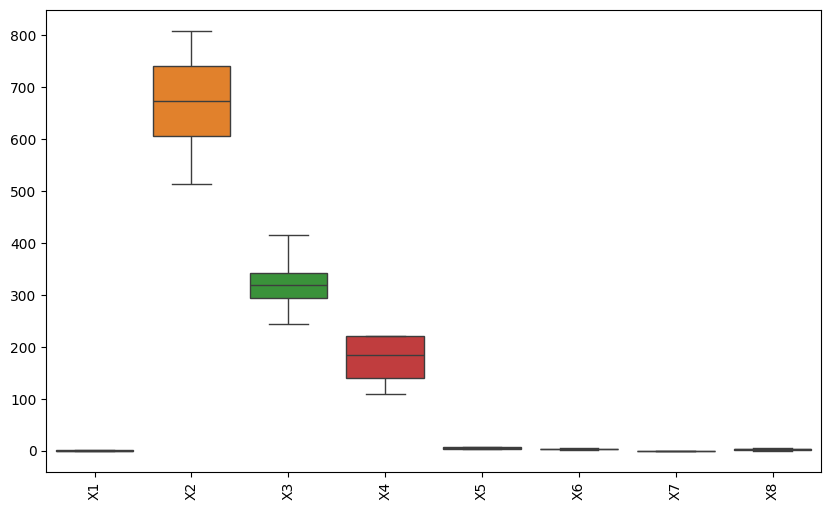

In [54]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.show()


###let's apply minmax scaler for normalization

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [78]:
X_scaled

,X1,X2,X3,X4,X5,X6,X7,X8
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...
763,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0
764,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0
765,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0
766,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0


###checking for skewness

In [79]:
print(X_scaled.skew())

X1    4.955125e-01
X2   -1.251309e-01
X3    5.334175e-01
X4   -1.627640e-01
X5    0.000000e+00
X6   -3.581849e-16
X7   -6.025423e-02
X8   -8.868918e-02
dtype: float64


In [80]:
print(X_scaled.kurtosis())

X1   -0.706568
X2   -1.059454
X3    0.116593
X4   -1.776947
X5   -2.005229
X6   -1.361042
X7   -1.327629
X8   -1.148709
dtype: float64


### Our data is very slightly skewed so no need for transformation , as of now

### check missing values in our data

In [11]:
X.duplicated().sum() #no duplicate values in our dataset

np.int64(0)

### drawing box plot to check outliers and variance in data

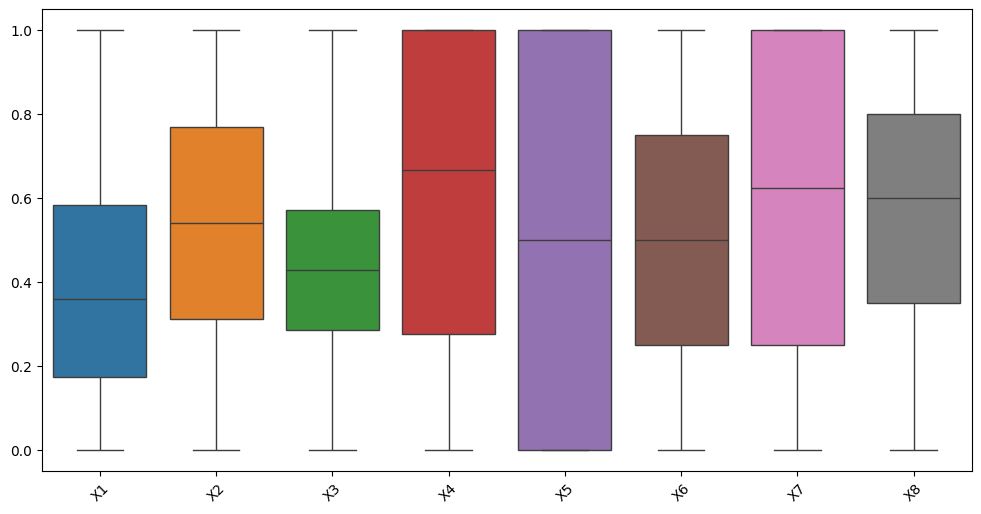

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 6))

sns.boxplot(data=X_scaled)

plt.xticks(rotation=45)

plt.show()

#no outlers in our data

Text(0.5, 1.0, 'Shifted Linear Correlation Matrix')

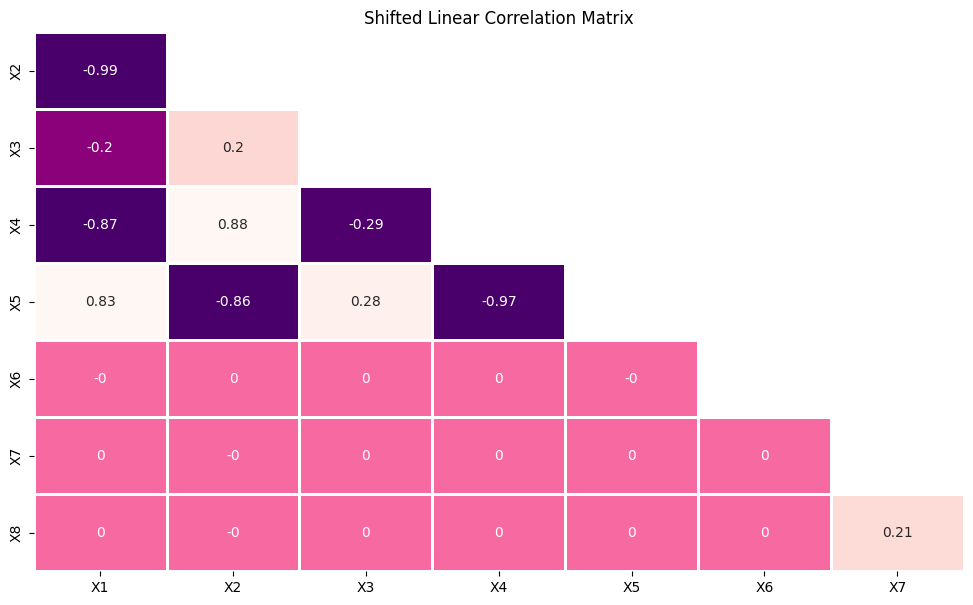

In [82]:
corr_mat = X_scaled.corr().round(2)
f, ax = plt.subplots(figsize=(12,7))
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
mask = mask[1:,:-1]
corr = corr_mat.iloc[1:,:-1].copy()
sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0,
            cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
#     bottom, top = ax.get_ylim()
#     ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Shifted Linear Correlation Matrix')

### there is high correlation between some of the feature , we have to fix this issue .


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
n = X_test.shape[0]  # Number of rows (test data)
p = X_test.shape[1]

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
adj_r2 = 1 - ((1 - r2_score(y_test, y_pred)) * (n - 1) / (n - p - 1))

print("R² Score:", r2_score(y_test, y_pred))
print("adj R² Score:", adj_r2)


R² Score: 0.9027048110077099
adj R² Score: 0.8973368005805491


###performing a simple linear regression are giving good results , reflected by R values , lets us handle the high corelation problem and try again , we'll use Recursive Feature Elimination for feature selection

In [88]:


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_scaled, y)
print(X_scaled.columns[rfe.support_])


Index(['X1', 'X2', 'X4', 'X5', 'X7'], dtype='object')


In [89]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_scaled, y)
print(X_scaled.columns[rfe.support_])

Index(['X1', 'X2', 'X3', 'X7', 'X8'], dtype='object')


In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled[['X1', 'X2', 'X4', 'X5', 'X7']], y, test_size=0.2, random_state=42)
n = X_test.shape[0]  # Number of rows (test data)
p = X_test.shape[1]

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
adj_r2 = 1 - ((1 - r2_score(y_test, y_pred)) * (n - 1) / (n - p - 1))

print("R² Score:", r2_score(y_test, y_pred))
print("adj R² Score:", adj_r2)


X_train, X_test, y_train, y_test = train_test_split(X_scaled[['X1', 'X2', 'X3', 'X7', 'X8']], y, test_size=0.2, random_state=42)
n = X_test.shape[0]  # Number of rows (test data)
p = X_test.shape[1]

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
adj_r2 = 1 - ((1 - r2_score(y_test, y_pred)) * (n - 1) / (n - p - 1))

print("R² Score:", r2_score(y_test, y_pred))
print("adj R² Score:", adj_r2)

R² Score: 0.9020666273807457
adj R² Score: 0.8987580674949601
R² Score: 0.8796406000906971
adj R² Score: 0.8755744041478153


### RFE with linear regression and decision tree models dosen't seem to improve performance , lets try Ridge and Lasso regression

In [91]:
from sklearn.linear_model import Ridge, Lasso
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

ridge_r2 = r2_score(y_test, ridge.predict(X_test))
lasso_r2 = r2_score(y_test, lasso.predict(X_test))

print("Ridge Test R²:", ridge_r2)
print("Lasso Test R²:", lasso_r2)


Ridge Test R²: 0.89889477202216
Lasso Test R²: 0.890480710734358


### Ridge and Lasso also do not improve the performance on the contrary seems to degrade it , in conclusion it looks like the features are important to maintain the performance . Let's check for polynomial relations

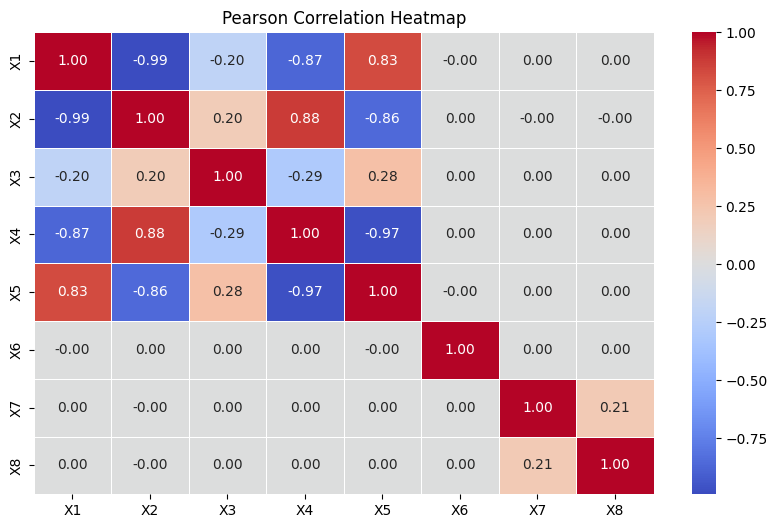

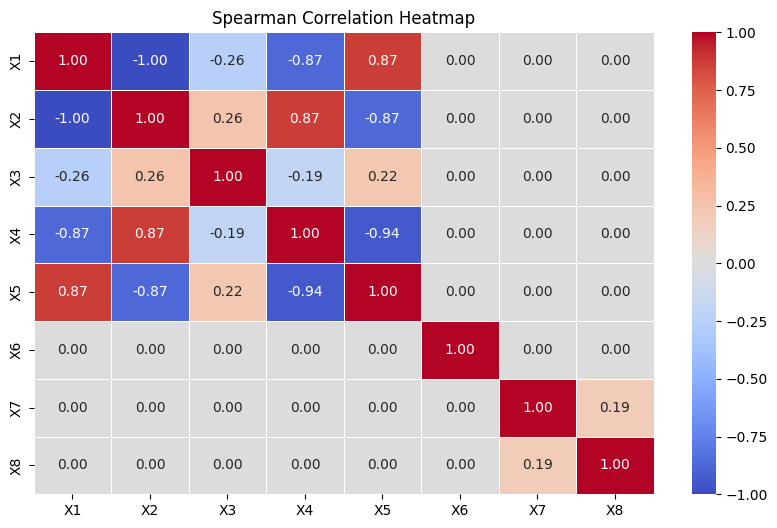

In [93]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Pearson and Spearman correlations
pearson_corr = X_scaled.corr(method='pearson')
spearman_corr = X_scaled.corr(method='spearman')

# Function to plot a heatmap
def plot_correlation_heatmap(corr_matrix, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
    plt.title(title)
    plt.show()

# Plot Pearson Correlation Heatmap
plot_correlation_heatmap(pearson_corr, "Pearson Correlation Heatmap")

# Plot Spearman Correlation Heatmap
plot_correlation_heatmap(spearman_corr, "Spearman Correlation Heatmap")


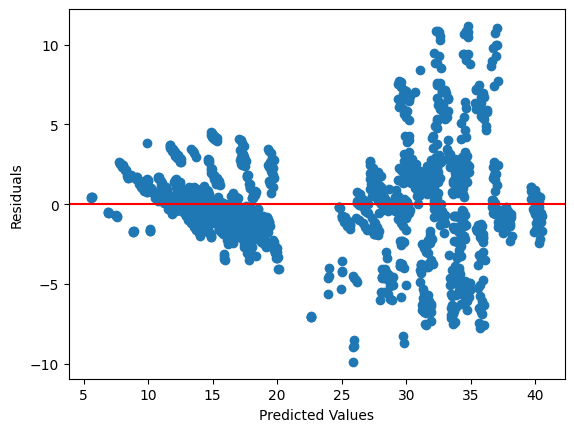

In [112]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled, y)

# Compute residuals
residuals = y - model.predict(X_scaled)

# Plot residuals
plt.scatter(model.predict(X_scaled), residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


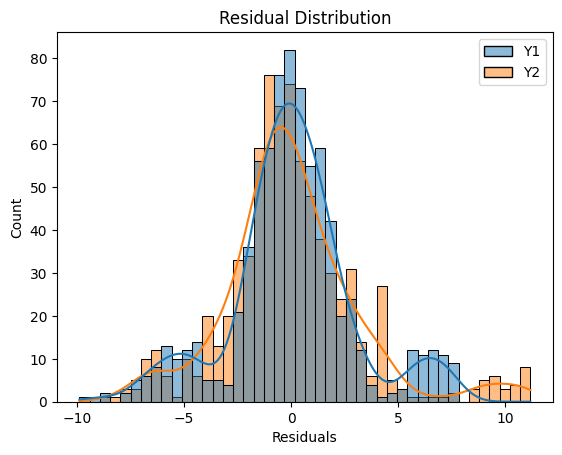

In [113]:
import seaborn as sns
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()


### slighly higher spreaman correlation, pattern formation in residuals, residual distribution not being normal suggest that there might be polynomial relation , so lets confirm by running linear regression on the features and also on the polynolmial features that we'll create


In [96]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X_scaled)

In [97]:
X_poly.shape

(768, 37)

In [98]:
X_poly = pd.DataFrame(X_poly)

In [100]:
X_poly

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
1,1.0,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.333333,0.0,0.0,0.000000,0.000000,0.0
2,1.0,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.666667,0.0,0.0,0.000000,0.000000,0.0
3,1.0,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.0
4,1.0,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.129630,...,0.111111,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1.0,0.055556,0.916667,0.571429,1.000000,0.0,1.000000,1.0,1.0,0.050926,...,0.000000,1.000000,1.0,1.0,0.000000,0.0,0.0,1.000000,1.000000,1.0
764,1.0,0.000000,1.000000,0.714286,1.000000,0.0,0.000000,1.0,1.0,0.000000,...,0.000000,0.000000,1.0,1.0,0.000000,0.0,0.0,0.000000,0.000000,1.0
765,1.0,0.000000,1.000000,0.714286,1.000000,0.0,0.333333,1.0,1.0,0.000000,...,0.000000,0.333333,1.0,1.0,0.000000,0.0,0.0,0.333333,0.333333,1.0
766,1.0,0.000000,1.000000,0.714286,1.000000,0.0,0.666667,1.0,1.0,0.000000,...,0.000000,0.666667,1.0,1.0,0.000000,0.0,0.0,0.666667,0.666667,1.0


In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
n = X_test.shape[0]  # Number of rows (test data)
p = X_test.shape[1]

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
adj_r2 = 1 - ((1 - r2_score(y_test, y_pred)) * (n - 1) / (n - p - 1))

print("R² Score:", r2_score(y_test, y_pred))
print("adj R² Score:", adj_r2)

R² Score: 0.980831629991568
adj R² Score: 0.9730939393459624


### nearly 7 points improvement in the R score establishes that the relation is polynomial , please find the coefficients that contributed most to our regression results in decreasing order

In [128]:

# Coefficients imporance in decreasing order w.r.t Y1
feature_names = poly.get_feature_names_out(input_features=X.columns)
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient_Y1': model.coef_[0],
    'Coefficient_Y2': model.coef_[1]
})
coef_df['Abs_Coefficient_Y1'] = coef_df['Coefficient_Y1'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient_Y1', ascending=False)
print("\nTop 10 Features by Coefficient Magnitude for Y1:")
print(coef_df)


Top 10 Features by Coefficient Magnitude for Y1:
   Feature  Coefficient_Y1  Coefficient_Y2  Abs_Coefficient_Y1
9    X1 X2   -1.949308e+03   -2.753602e+03        1.949308e+03
8     X1^2   -1.910603e+03   -2.703121e+03        1.910603e+03
11   X1 X4   -1.604042e+03   -2.260598e+03        1.604042e+03
30   X4 X5    9.914302e+02    1.395307e+03        9.914302e+02
19   X2 X5    8.765151e+02    1.225789e+03        8.765151e+02
4       X5    6.238086e+02    8.890809e+02        6.238086e+02
10   X1 X3   -6.145535e+02   -8.790538e+02        6.145535e+02
17   X2 X3   -4.947755e+02   -7.089261e+02        4.947755e+02
24   X3 X4   -4.905087e+02   -7.021719e+02        4.905087e+02
16    X2^2   -3.938676e+02   -5.490834e+02        3.938676e+02
3       X4    3.847687e+02    5.306654e+02        3.847687e+02
1       X2    3.465689e+02    4.670685e+02        3.465689e+02
25   X3 X5   -2.830612e+02   -4.141013e+02        2.830612e+02
12   X1 X5    2.213782e+02    2.875715e+02        2.213782e+02
18   

### we have created a pretty good model that captures 98 % variance in our data